## Галиаскаров Оскар Владимир Ирекович

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

import os

import warnings
warnings.filterwarnings('ignore')

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

**Выполнил:** Галиаскаров Оскар Владимир Ирекович



In [2]:
## Директория с репозиторием, с данными
data_path = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\mipt_data_science_2021\\data'

In [3]:
df = pd.read_csv(data_path + '\\people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# 1. Изучение датасета (5 баллов)

**1.1 Какие признаки численные?**




In [13]:
print('Численные признаки:', ', '.join( df.dtypes[df.dtypes.isin([np.dtype('float64'),np.dtype('int64')]) \
                                                  & (df.nunique() > 2)].index ) )

Численные признаки: children, salary, age, home_cost, happyness


**1.2 Какие признаки категориальные?**


In [15]:
print('Категориальные признаки:', ', '.join( df.dtypes[(df.dtypes == np.dtype('object')) & (df.nunique() > 2)].index ) )

Категориальные признаки: profession


**1.3 Какие признаки бинарные?**


In [16]:
print('Бинарные признаки:', ', '.join( df.dtypes[(df.nunique() == 2)].index ) )

Бинарные признаки: was_married, sex, drive_info


**1.4 Какие признаки имеют нормальное распределение?**


In [34]:
# для каждого численного признака применим тест (Критерий) Шапиро-Уилка с уровнем значимости 0.01:
# если p-value теста меньше этого значения, то отвергаем гипотезу о нормлаьности распределения.
alpha = 0.01

for col in df.dtypes[df.dtypes.isin([np.dtype('float64')])].index:
    p_value = scipy.stats.normaltest(df['children'])[1]
    if p_value > alpha:
        print('Признак '+col.ljust(10)+' выглядит нормально (не отвергаем гипотезу нормальности)')
    else:
        print('Признак '+col.ljust(10)+' выглядит не нормально распределённым (отвергаем гипотезу нормальности)')
    

Признак children   выглядит не нормально распределённым (отвергаем гипотезу нормальности)
Признак salary     выглядит не нормально распределённым (отвергаем гипотезу нормальности)
Признак age        выглядит не нормально распределённым (отвергаем гипотезу нормальности)
Признак home_cost  выглядит не нормально распределённым (отвергаем гипотезу нормальности)
Признак drive_info выглядит не нормально распределённым (отвергаем гипотезу нормальности)
Признак happyness  выглядит не нормально распределённым (отвергаем гипотезу нормальности)


Ответ: **никакие**

**1.5 Какие признаки бессмысленные?**

In [35]:
print('Бессмысленные признаки:', ', '.join( df.dtypes[(df.nunique() <= 1)].index ) )

Бессмысленные признаки: 


Все признаки имеют больше одного уровня, а значит бессмысленных нет

Ответ: **никакие**
    

# 2. Чистка датасета (5 баллов)

**2.1 Есть ли дубли в данных?**

In [36]:
print('Кол-во полных дублей:', df.duplicated().sum() )

Кол-во полных дублей: 0


Ответ: **Нет**

**2.2 Есть ли пропуски в данных?**

In [37]:
print('Поля, в который есть пропуски, и доля пропусков в них:')
print(df.isnull().mean()[df.isnull().sum()>0] )

Поля, в который есть пропуски, и доля пропусков в них:
drive_info    0.461667
dtype: float64


Ответ: **Есть**

 **2.3 Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )**

На мой взгляд правильно заменять пропуски (выделять новый уровень). Так как отсутствие данных можно принимать за признак (фактор).

In [38]:
df = df.fillna(-1)

**2.4 Удалить бесмысленные признаки (`drop()`)**

Таковых не нашли

**2.5 Найти и удалить выбросы по признаку `home_cost`. Сколько их?**

Примем за выбросы объекты выборки, выходящие за диапазон ±3 стандартных отклонения от среднего

Рапределение объектов внутри указанного диапазона:


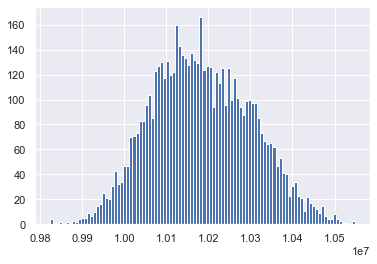

Кол-во выбросов: 5 , список значений выбросов: 20321276, 20311969, 19794878, 19795323, 20657916


In [39]:
isin_3std = df['home_cost'].between(df['home_cost'].mean()-3*df['home_cost'].std(),df['home_cost'].mean()+3*df['home_cost'].std() )

print('Рапределение объектов внутри указанного диапазона:')
df.loc[isin_3std,'home_cost'].hist(bins=100)
plt.show()

print('Кол-во выбросов:',(~isin_3std).sum(),', список значений выбросов:',', '.join([str(round(i) ) for i in df.loc[~isin_3std,'home_cost'].values])  )
df = df.loc[isin_3std]

# 3 Изучение зависимых признаков (5 балла). 

**3.1 Построить матрицу корреляций**



In [40]:
df.corr()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
was_married,1.000000,0.242498,-0.481980,0.337530,0.200835,-0.341256,0.006817,0.252553
children,0.242498,1.000000,0.375516,0.389386,0.743025,0.286174,-0.010847,0.605916
salary,-0.481980,0.375516,1.000000,0.240089,0.073205,0.685847,-0.019446,0.200589
sex,0.337530,0.389386,0.240089,1.000000,0.341700,0.184011,-0.030123,0.470089
age,0.200835,0.743025,0.073205,0.341700,1.000000,0.053093,0.009078,0.609307
home_cost,-0.341256,0.286174,0.685847,0.184011,0.053093,1.000000,-0.027720,0.153435
drive_info,0.006817,-0.010847,-0.019446,-0.030123,0.009078,-0.027720,1.000000,-0.008174
happyness,0.252553,0.605916,0.200589,0.470089,0.609307,0.153435,-0.008174,1.000000


**3.2 Визуализировать матрицу корреляции с помощью heatmap**


Вычтем единичную матрицу (для более наглядного диапазона корреляций)

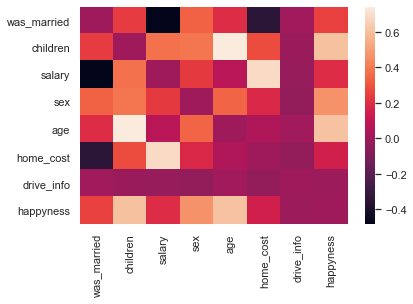

In [41]:
sns.heatmap(df.corr()-np.eye(len(df.corr())))
plt.show()

**3.3 Сделать выводы по самым скоррелированные признакам**


In [43]:
## Выпишем попарные корреляции фактора с оставшимися:
corr_cols = df.corr().columns # Факторы для проверки корреляции
corr_mtrx = []
for i in [[[i,j,df[i].corr(df[j])] for j in corr_cols[list(corr_cols).index(i)+1:]]  for i in corr_cols]:
    corr_mtrx.extend(i)
corr_mtrx = pd.DataFrame(corr_mtrx,columns=['col1','col2','corr'])

print('Топ 5 пар самых скоррелированных факторов:')

corr_mtrx.sort_values('corr',key=lambda x: abs(corr_mtrx['corr']),ascending=False ).head(5)

Топ 5 пар самых скоррелированных факторов:


,col1,col2,corr
9,children,age,0.743025
15,salary,home_cost,0.685847
24,age,happyness,0.609307
12,children,happyness,0.605916
1,was_married,salary,-0.481980


**Выводы:**
1. Чем выше возраст, тем больше детей (логично)
2. Чем дороже дом, тем больше зарплата (логично)
3. С возрастом счастье увеличивается (выборка явно не из России)
4. Чем больше детей - тем больше счастья (аналогчно прошлому пункту)
5. Если состоял(а) в браке - доход ниже (более чем логично)

**3.4 Построить график зависимости между двумя самыми зависимыми признаками**


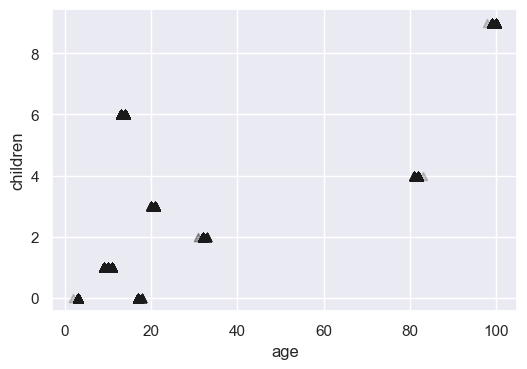

In [44]:
plt.figure(dpi=100)
plt.xlabel(corr_mtrx.loc[corr_mtrx['corr'].argmax()]['col2'])
plt.ylabel(corr_mtrx.loc[corr_mtrx['corr'].argmax()]['col1'])
plt.scatter(df[corr_mtrx.loc[corr_mtrx['corr'].argmax()]['col2']],df[corr_mtrx.loc[corr_mtrx['corr'].argmax()]['col1']],
           marker='^',alpha=0.2,color='k')

plt.show()

Прослеживается зависимость между возрастом и кол-вом детей

Особенно интересны случаи, когда возраст менее 20 лет (около 14), а количество детей = 6

# 4 Нормировка признаков (3 балла)
**4.1 Отнормировать данные**


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

Scaler = StandardScaler()

#Выбираем признаки для нормировки - численные
cols_to_transform = df.dtypes[df.dtypes.isin([np.dtype('float64'),np.dtype('int64')])].index

# Нормируем
df.loc[:,cols_to_transform] = Scaler.fit_transform(df.loc[:,cols_to_transform])


**4.2 Обосновать выбор нормировки**

Был выбран метод StandardScaler - как оптимальный:

* MinMaxScaler - сильно смещает выборку, если есть выбросы (т.к. будет нормировать относительно них)
* RobustScaler - наоборот, совесем не учитывает распределения "хвостов" (так как "обрезает" квантили)


# 5 Выделить кластеры (6 баллов)
**5.1 Определить оптимальное количество кластеров с помощью правила локтя/осыпи**


In [53]:
from tqdm import tqdm_notebook 
from sklearn.cluster import KMeans

# определим функцию для подсчёта ошибки (rmse внутри кластеров)
def within_rmse(data, centroids, labels):
    """
    Compute total sum of squares of a prototype clustering
    algorithm.
    """

    wrmse = 0
    for l in np.unique(labels):
        data_l = data[labels == l]
        resid = data_l - centroids[l]
        wrmse += np.sqrt((resid**2).mean())
    return wrmse/len(np.unique(labels))

# выделим кластеры
niter, n_clusters_max = 5, 25 # количество итераций (повторов) и максимальное кол-во кластеров
wrmse = []
for n_clusters in tqdm_notebook(range(1,n_clusters_max)):
    for random_state in range(niter):
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state, max_iter=500)
        cluster_labels = clusterer.fit_predict(df[cols_to_transform])
        wrmse.append({'n_clusters':n_clusters,
                    'random_state':random_state,
                    'within_rmse': within_rmse(df[cols_to_transform],clusterer.cluster_centers_,cluster_labels).mean()
                   })
wrmse = pd.DataFrame(wrmse)

  0%|          | 0/24 [00:00<?, ?it/s]

In [54]:
# сгруппируем ошибку по кол-ву кластеров
wrmse = wrmse.groupby(['n_clusters'])['within_rmse'].agg(['mean','std']).reset_index() 

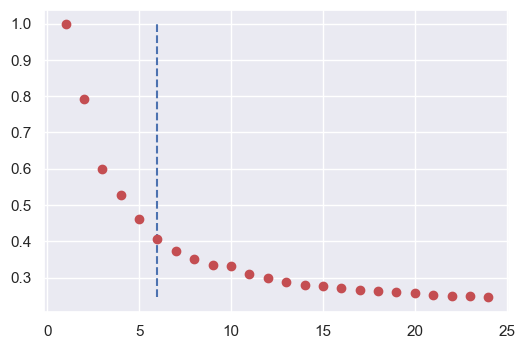

In [55]:
plt.figure(dpi=100)
plt.errorbar(range(1,n_clusters_max), wrmse['mean'], yerr=wrmse['std'], fmt='ro')
plt.plot([6]*11, np.linspace(wrmse['mean'].min(),wrmse['mean'].max(),11) , linestyle='--')
plt.show()

После 6 кластеров улучшение (ошибки) существенно замедляется, поэтому выберем именно такое кол-во

Так же приемлемым выглядит 11 кластеров.

**5.2 Получить номера класстеров для каждого пользователя.**

Применим кластеризацию с указанными параметрами

In [56]:
clusterer = KMeans(n_clusters=6, random_state=0, max_iter=500)
df['cluster_label'] = clusterer.fit_predict(df[cols_to_transform])


# 6. Снизить размерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [58]:
from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, learning_rate='auto',
                random_state=0, n_jobs=-1, 
                init='random').fit_transform(df[cols_to_transform],df['cluster_label'])

# 7. Нарисовать полученные кластеры (10 баллов)

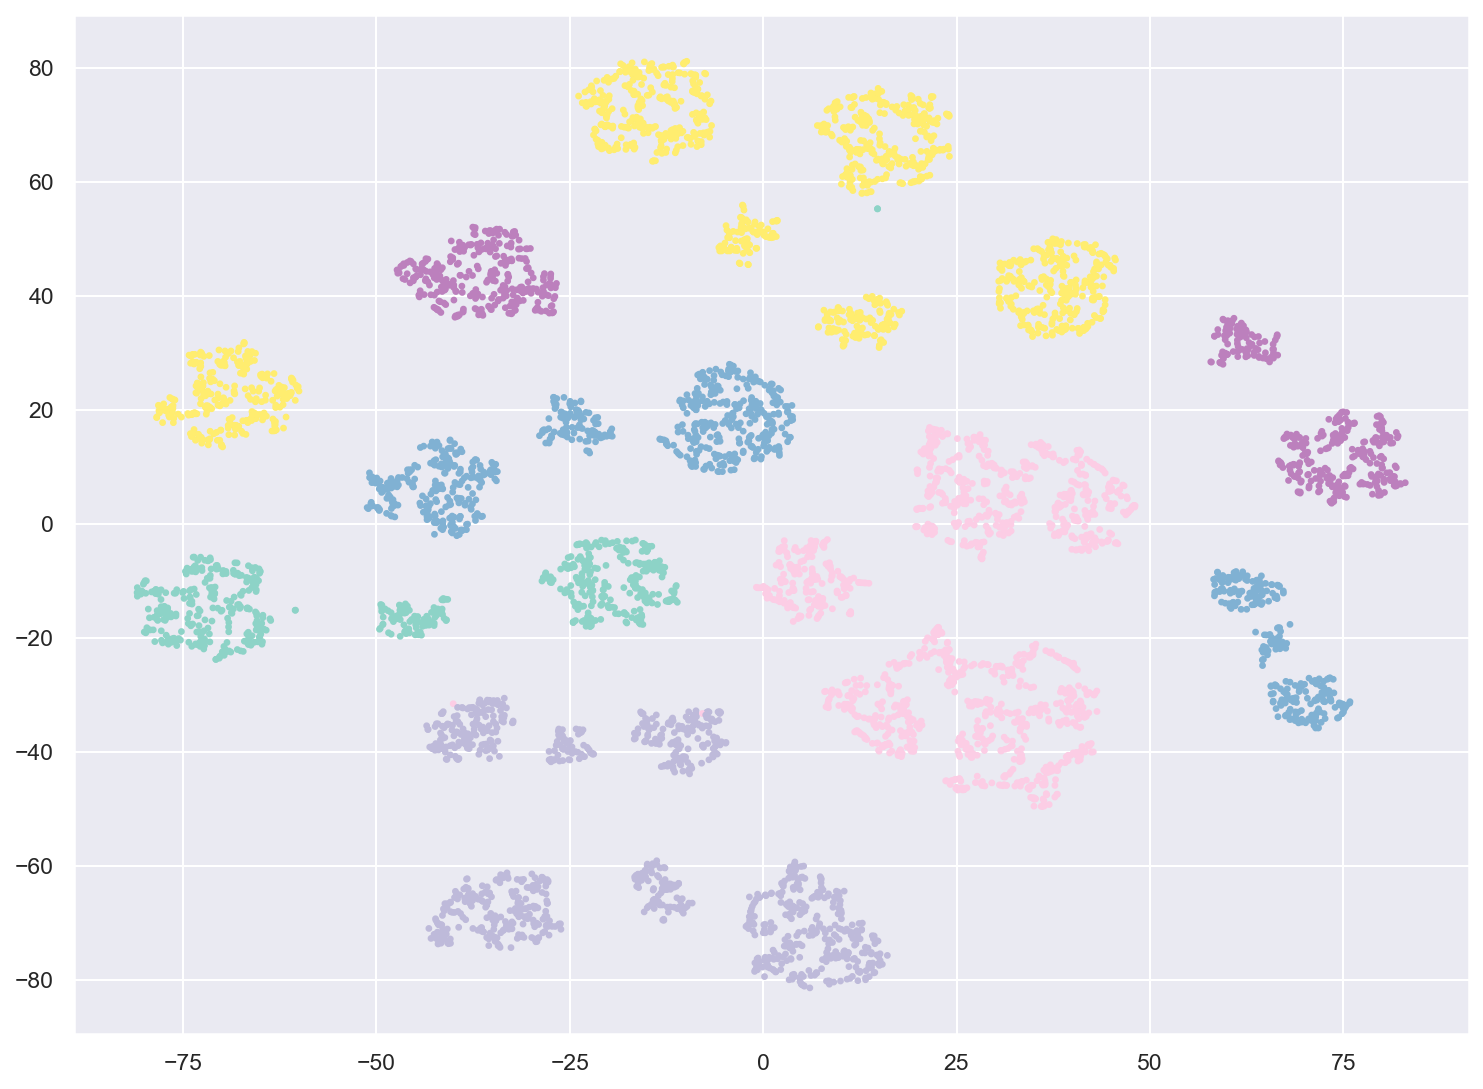

In [69]:
data_x, data_y = data_x_y[:,0],data_x_y[:,1] # Разбивка вдоль главных компонент: x, y

plt.figure(figsize=(12,9), dpi=150)
plt.scatter(data_x, data_y, c=df['cluster_label'].values, cmap ='Set3', s=5)
# plt.legend(cluster_labels)
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**